#### 연비 예측하기
- 목적 : 연비 예측
- 데이터셋 : auto-mpg.csv
- 피쳐/속성 : displacement, model year
- 타겟/라벨 : mpg (연비)
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : LinearRegression

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[1] 데이터 준비

In [104]:
carDF = pd.read_csv('../data/auto_mpg.csv')
carDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


mpg : 연비(miles per gallon)  
cylinders : 실린더수  
displacement : 배기량  
horsepower: 출력  
weight : 차 무게  
acceleration : 가속능력  
model year : 출시년도  
origin : 제조국 1(USA), 2(EU), 3(JPN)  
name : 모델명  

In [105]:
carDF.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [106]:
carDF.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [107]:
carDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [108]:
carDF[carDF['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [109]:
number = carDF[carDF['horsepower']=='?'].index.tolist()
number

[32, 126, 330, 336, 354, 374]

In [110]:
carDF = carDF.drop(number)
carDF = carDF.reset_index(drop=True)
carDF['horsepower'] = carDF['horsepower'].astype('int64')
carDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [111]:
carDF.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


- 피쳐와 타겟 분리

In [112]:
fearture = carDF[['model year', 'displacement']]
target = carDF['mpg']

- 훈련용, 테스트용 데이터 생성

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(fearture, target, test_size=0.2, random_state=10)

In [115]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [116]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')

print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (313, 2), 2D
X_test : (79, 2), 2D
y_train : (313,), 1D
y_test : (79,), 1D


- 피쳐 스케일링

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [118]:
mmScaler = MinMaxScaler()

In [119]:
mmScaler.fit(X_train)

MinMaxScaler()

In [120]:
# 모델 파라미터 출력해보기
print(mmScaler.min_, mmScaler.n_features_in_, mmScaler.n_samples_seen_, mmScaler.feature_names_in_, mmScaler.data_min_, mmScaler.data_max_, sep='\n')

[-5.83333333 -0.17571059]
2
313
['model year' 'displacement']
[70. 68.]
[ 82. 455.]


In [121]:
# 훈련용 데이터 스케일링 실행
X_train_scaled = mmScaler.transform(X_train)
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0)

In [122]:
# 테스트 데이터 스케일링 실행
X_test_scaled = mmScaler.transform(X_test)
X_test_scaled.min(), X_test_scaled.max()

(0.0, 1.0)

[2] 훈련 진행

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [125]:
# 학습 진행
model.fit(X_train_scaled, y_train)

LinearRegression()

In [126]:
# 학습 후 모델 파라미터
print(f'model.coef_ : {model.coef_}')
print(f'model.intercept_ : {model.intercept_}')

model.coef_ : [  8.3538628  -19.83459206]
model.intercept_ : 25.856594222436037


- 모델 성능 평가

In [127]:
model.score(X_test_scaled, y_test)

0.7368835380398491

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [129]:
predict_y = model.predict(X_test_scaled)

In [130]:
mse = mean_squared_error(y_test, predict_y)
rmse = mean_squared_error(y_test, predict_y, squared=False)
mae = mean_absolute_error(y_test, predict_y)
r2 = r2_score(y_test, predict_y)

In [131]:
## 손실/비용함수 값은 0에 가까울수록
# 결정계수(R2)의 값은 1에 가까울수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 16.143314271821687
rmse : 4.0178743474406575
mae : 2.996194016347379
r2 : 0.7368835380398491


In [132]:
test_list = []
for n in X_test_scaled:
    test_list.append(n[1])

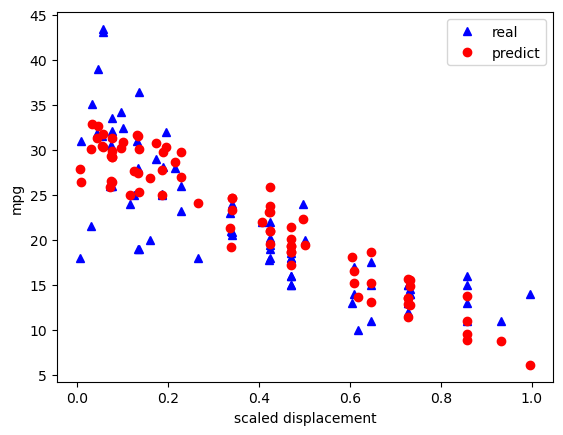

In [136]:
# 데이터의 분포 시각화
plt.plot(test_list, y_test,'b^' , label='real')
plt.plot(test_list, predict_y,'ro', label='predict')
plt.xlabel('scaled displacement')
plt.ylabel('mpg')
plt.legend()
plt.show()